#### This notebook answers assignment part B question 2

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [2]:
raw_data = pd.read_csv('pima-indians-diabetes1.csv')
raw_data.columns = ['pregnant number','pgc','dbp','sft','insulin','bmi','dpf','age','class']

In [3]:
print(raw_data.describe())
attributes = raw_data.iloc[:,:-1].values
labels = raw_data.iloc[:,-1].values
trainX, testX, trainY, testY  = train_test_split(attributes,labels,test_size=0.3,random_state=30,stratify=labels)

       pregnant number         pgc         dbp         sft     insulin  \
count       767.000000  767.000000  767.000000  767.000000  767.000000   
mean          3.842243  120.859192   69.101695   20.517601   79.903520   
std           3.370877   31.978468   19.368155   15.954059  115.283105   
min           0.000000    0.000000    0.000000    0.000000    0.000000   
25%           1.000000   99.000000   62.000000    0.000000    0.000000   
50%           3.000000  117.000000   72.000000   23.000000   32.000000   
75%           6.000000  140.000000   80.000000   32.000000  127.500000   
max          17.000000  199.000000  122.000000   99.000000  846.000000   

              bmi         dpf         age       class  
count  767.000000  767.000000  767.000000  767.000000  
mean    31.990482    0.471674   33.219035    0.348110  
std      7.889091    0.331497   11.752296    0.476682  
min      0.000000    0.078000   21.000000    0.000000  
25%     27.300000    0.243500   24.000000    0.000000

#### Q 2.1

In [4]:
classifier = MLPClassifier(hidden_layer_sizes=(20,), max_iter=150, random_state=30, solver='sgd')
classifier.fit(trainX,trainY)
predictions = classifier.predict(testX)

In [5]:
print(classification_report(testY,predictions))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       151
           1       0.55      0.53      0.54        80

    accuracy                           0.69       231
   macro avg       0.65      0.65      0.65       231
weighted avg       0.68      0.69      0.69       231



#### Q 2.2

In [6]:
mlp = MLPClassifier(hidden_layer_sizes=(20,), max_iter=150,solver='sgd',random_state=30)

N = trainX.shape[0]
EPOCH = 25
BATCH_SIZE = 64
CLASSES = np.unique(trainY)

scores_train = []
scores_test = []
mlploss = []

In [7]:
epoch = 0
while epoch < EPOCH:
    # SHUFFLING
    random_perm = np.random.permutation(trainX.shape[0])
    
    mini_batch_index = 0
    while True:
        # MINI-BATCH
        indices = random_perm[mini_batch_index:mini_batch_index + BATCH_SIZE]        
        mlp.partial_fit(trainX[indices], trainY[indices], classes=CLASSES)
        mini_batch_index += BATCH_SIZE

        if mini_batch_index >= N:
            break

    # SCORE TRAIN
    scores_train.append(1-mlp.score(trainX, trainY))
    
     # SCORE TEST
    scores_test.append(1-mlp.score(testX, testY))
    
    # compute loss
    
    mlploss.append(mlp.loss_)
    epoch += 1


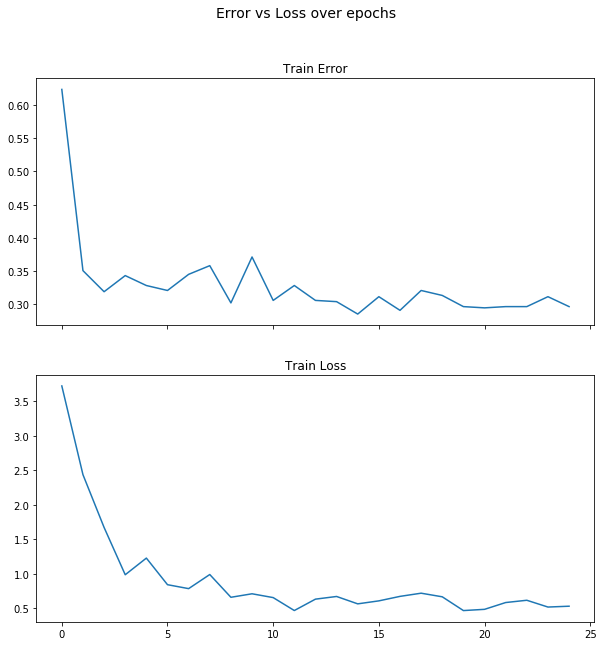

In [8]:
""" Plot """
fig, ax = plt.subplots(2, sharex=True, figsize=(10,10))
ax[0].plot(scores_train)
ax[0].set_title('Train Error')
ax[1].plot(mlploss)
ax[1].set_title('Train Loss')
fig.suptitle("Error vs Loss over epochs", fontsize=14)
plt.show()

#### Explaination

Loss indicates the negative consequences of error. This means when loss increases the error is bad for that iteration. If the error is bad then it means 


When the error decreases it tells us the direction in which we can get the fastest convergence of the model. At the same time, the loss value tells how negative are the consequences of going in the direction of the error. So if the loss decreases it means it is good to go in the direction of error and if the loss increases it is not good to go in the direction of the error. So when the loss value is too high it means that the current direction of error is too bad and we should not continue to go into that direction. So it can be seen in the graphs that when the loss is too high, the direction of error changes in the next iteration. 

#### Q 2.3

In [9]:
def neuronExperiment(trainX,trainY,testX,testY):
    data = []
    mlp = MLPClassifier(hidden_layer_sizes=(20,), max_iter=150, random_state=30,solver='sgd')
    mlp.fit(trainX,trainY)
    predictions = mlp.predict(testX)
    score = accuracy_score(testY,predictions)
    data.append({'Neurons':(20,0),'Accuracy':score})
    for i in range(1,20):
        mlp = MLPClassifier(hidden_layer_sizes=(20-i,i), max_iter=150, random_state=30,solver='sgd')
        mlp.fit(trainX,trainY)
        predictions = mlp.predict(testX)
        score = accuracy_score(testY,predictions)
        data.append({'Neurons':(20-i,i),'Accuracy':score})   
    dataFrame = pd.DataFrame(data,columns=['Neurons','Accuracy'])
    pd.set_option('display.precision',20)
#     print(dataFrame.to_string(index=False))
    return dataFrame

In [10]:
diabetes = neuronExperiment(trainX,trainY,testX,testY)
print(diabetes)

     Neurons                Accuracy
0    (20, 0)  0.68831168831168831890
1    (19, 1)  0.65367965367965363832
2    (18, 2)  0.65367965367965363832
3    (17, 3)  0.65800865800865804278
4    (16, 4)  0.65367965367965363832
5    (15, 5)  0.64069264069264064698
6    (14, 6)  0.67965367965367962100
7    (13, 7)  0.67532467532467532756
8    (12, 8)  0.69264069264069261234
9    (11, 9)  0.70129870129870131024
10  (10, 10)  0.69696969696969701680
11   (9, 11)  0.59307359307359308609
12   (8, 12)  0.71861471861471859501
13   (7, 13)  0.71428571428571430157
14   (6, 14)  0.67965367965367962100
15   (5, 15)  0.70562770562770560367
16   (4, 16)  0.67532467532467532756
17   (3, 17)  0.70129870129870131024
18   (2, 18)  0.65367965367965363832
19   (1, 19)  0.65367965367965363832


#### Q 2.4 
The weights and biases of the each of 20 Multi Layer perceptron networks are assigned at random for every instance. Based on the type of data and its compantibality with the classifier, the combination of neurons in each layer can vary. There is no standard architecture that gives the best accuracy across any dataset. To obtain desirable accuracy for a specific data set, it is advised to check maximum permutations and combinations by trial and error method. 

Flipping the number of neurons in each layer alters the accuracy in opposite direction in most of the cases. For example, distribution of neuron (15,5) and (5,15), accuracy is 0.6406 and 0.7056 respectively. Similarly, for (14,6) and (6,14) accuracy is 0.6536 and 0.6753. 

#### Q 2.5
Four suitable criteria for other datasets
<ol>
    <li>Number of features or attributes should be around 8</li>
    <li>Should be a classification problem</li>
    <li>Should contain only numerical data</li>
    <li>Should not contain any missing values</li> 
</ol>

#### Q 2.6

#### Selected Datasets
<ol>
    <li>Immunotherapy</li>
    <li>Cryotherapy</li>
    <li>Somerville Happiness survey</li>
    <li>Occupancy detection</li>
</ol>

Each of the selected datasets are binary classification problem which contain only numeric data, without any missing values having features or attributes near 8. 

#### Q 2.7.A

##### Data set **Immunotherapy**

In [11]:
immunotherapy = pd.read_excel('Immunotherapy.xlsx')
immunotherapy.head()
immunoAttributes = immunotherapy.iloc[:,:7]
immunoLabels = immunotherapy.iloc[:,-1]

In [12]:
immunoTrainX,immunoTestX,immunoTrainY,immunoTestY = train_test_split(immunoAttributes,immunoLabels,test_size=.3,random_state=30,stratify=immunoLabels)
immunoResults = neuronExperiment(immunoTrainX,immunoTrainY,immunoTestX,immunoTestY)
print(immunoResults)

     Neurons                Accuracy
0    (20, 0)  0.51851851851851848973
1    (19, 1)  0.77777777777777779011
2    (18, 2)  0.77777777777777779011
3    (17, 3)  0.22222222222222220989
4    (16, 4)  0.59259259259259255970
5    (15, 5)  0.77777777777777779011
6    (14, 6)  0.74074074074074069962
7    (13, 7)  0.77777777777777779011
8    (12, 8)  0.66666666666666662966
9    (11, 9)  0.77777777777777779011
10  (10, 10)  0.81481481481481476958
11   (9, 11)  0.74074074074074069962
12   (8, 12)  0.77777777777777779011
13   (7, 13)  0.74074074074074069962
14   (6, 14)  0.77777777777777779011
15   (5, 15)  0.74074074074074069962
16   (4, 16)  0.74074074074074069962
17   (3, 17)  0.59259259259259255970
18   (2, 18)  0.77777777777777779011
19   (1, 19)  0.77777777777777779011


##### Data set **Cryotherapy**

In [13]:
cryotherapy = pd.read_excel('Cryotherapy.xlsx')
cryoAttributes = cryotherapy.iloc[:,:6]
cryoLabels = cryotherapy.iloc[:,-1]

In [14]:
cryoTrainX,cryoTestX,cryoTrainY,cryoTestY = train_test_split(cryoAttributes,cryoLabels,test_size=.3,random_state=30,stratify=cryoLabels)
cryoResults = neuronExperiment(cryoTrainX,cryoTrainY,cryoTestX,cryoTestY)
print(cryoResults)

     Neurons                Accuracy
0    (20, 0)  0.51851851851851848973
1    (19, 1)  0.51851851851851848973
2    (18, 2)  0.55555555555555558023
3    (17, 3)  0.51851851851851848973
4    (16, 4)  0.85185185185185186008
5    (15, 5)  0.85185185185185186008
6    (14, 6)  0.48148148148148145475
7    (13, 7)  0.74074074074074069962
8    (12, 8)  0.55555555555555558023
9    (11, 9)  0.85185185185185186008
10  (10, 10)  0.92592592592592593004
11   (9, 11)  0.51851851851851848973
12   (8, 12)  0.88888888888888883955
13   (7, 13)  0.74074074074074069962
14   (6, 14)  0.70370370370370372015
15   (5, 15)  0.51851851851851848973
16   (4, 16)  0.66666666666666662966
17   (3, 17)  0.40740740740740738479
18   (2, 18)  0.48148148148148145475
19   (1, 19)  0.51851851851851848973


##### Data set **Somerville Happiness**

In [15]:
soha = pd.read_csv('SomerHappi.csv',encoding='utf-16')
sohaAttributes = soha.iloc[:,1:]
sohaLabels = soha.iloc[:,0]

In [16]:
sohaTrainX,sohaTestX,sohaTrainY,sohaTestY = train_test_split(sohaAttributes,sohaLabels,test_size=.3,random_state=30,stratify=sohaLabels)
sohaResults = neuronExperiment(sohaTrainX,sohaTrainY,sohaTestX,sohaTestY)
print(sohaResults)

     Neurons                Accuracy
0    (20, 0)  0.58139534883720933589
1    (19, 1)  0.53488372093023250908
2    (18, 2)  0.53488372093023250908
3    (17, 3)  0.53488372093023250908
4    (16, 4)  0.48837209302325579330
5    (15, 5)  0.53488372093023250908
6    (14, 6)  0.48837209302325579330
7    (13, 7)  0.44186046511627907751
8    (12, 8)  0.53488372093023250908
9    (11, 9)  0.58139534883720933589
10  (10, 10)  0.58139534883720933589
11   (9, 11)  0.51162790697674420670
12   (8, 12)  0.46511627906976743541
13   (7, 13)  0.48837209302325579330
14   (6, 14)  0.46511627906976743541
15   (5, 15)  0.60465116279069763827
16   (4, 16)  0.58139534883720933589
17   (3, 17)  0.58139534883720933589
18   (2, 18)  0.51162790697674420670
19   (1, 19)  0.53488372093023250908


In [17]:
occu = pd.read_csv('occupancy.csv')
occuAttributes = occu.iloc[:,:5]
occuLabels = occu.iloc[:,5]

In [18]:
occuTrainX,occuTestX,occuTrainY,occuTestY = train_test_split(occuAttributes,occuLabels,test_size=.3,random_state=30,stratify=occuLabels)
occuResults = neuronExperiment(occuTrainX,occuTrainY,occuTestX,occuTestY)
print(occuResults)

     Neurons                Accuracy
0    (20, 0)  0.96561604584527216399
1    (19, 1)  0.78755628325828896941
2    (18, 2)  0.78755628325828896941
3    (17, 3)  0.78755628325828896941
4    (16, 4)  0.93491608677855098097
5    (15, 5)  0.78755628325828896941
6    (14, 6)  0.98403602128530498483
7    (13, 7)  0.94801473598035201906
8    (12, 8)  0.98444535407286126727
9    (11, 9)  0.78755628325828896941
10  (10, 10)  0.97175603765861640060
11   (9, 11)  0.97380270159639792382
12   (8, 12)  0.95783872288170279763
13   (7, 13)  0.93450675399099469853
14   (6, 14)  0.78755628325828896941
15   (5, 15)  0.78755628325828896941
16   (4, 16)  0.78755628325828896941
17   (3, 17)  0.78755628325828896941
18   (2, 18)  0.78755628325828896941
19   (1, 19)  0.78755628325828896941


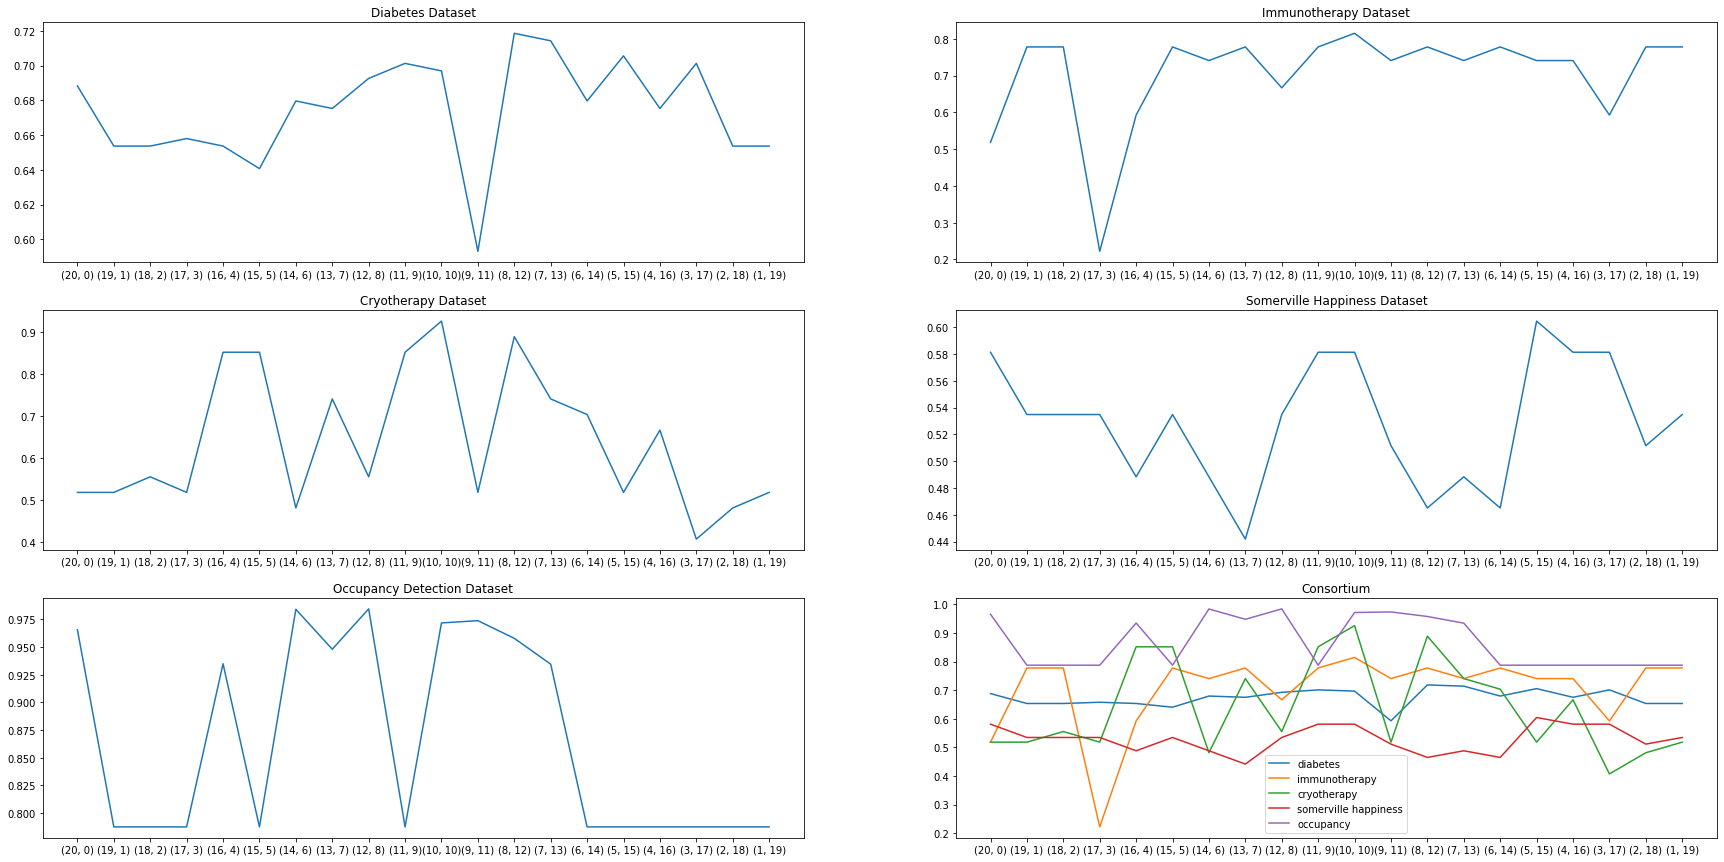

In [19]:
fig,axs = plt.subplots(3,2,figsize=(30,15))
axs[0, 0].plot(diabetes.iloc[:,1])
axs[0, 0].set_title('Diabetes Dataset')
axs[0, 1].plot(immunoResults.iloc[:,1])
axs[0, 1].set_title('Immunotherapy Dataset')
axs[1, 0].plot(cryoResults.iloc[:,1])
axs[1, 0].set_title('Cryotherapy Dataset')
axs[1, 1].plot(sohaResults.iloc[:,1])
axs[1, 1].set_title('Somerville Happiness Dataset')
axs[2, 0].plot(occuResults.iloc[:,1])
axs[2, 0].set_title('Occupancy Detection Dataset')
axs[2, 1].plot(diabetes.iloc[:,1],label='diabetes')
axs[2, 1].plot(immunoResults.iloc[:,1],label='immunotherapy')
axs[2, 1].plot(cryoResults.iloc[:,1],label='cryotherapy')
axs[2, 1].plot(sohaResults.iloc[:,1],label='somerville happiness')
axs[2, 1].plot(occuResults.iloc[:,1],label='occupancy')
axs[2, 1].set_title('Consortium')
axs[2, 1].legend()
xaxis = np.arange(0,20,1)
xaxislabels = [(20-i,i) for i in xaxis]
plt.setp(axs, xticks=np.arange(0,20,1), xticklabels=xaxislabels)
plt.show()

#### Q 2.7.B

It is a fact that better accuracy can be obtained from larger data sets as compared to smaller datasets in terms of neural network algorithms (Linjordet & Balog, 2019). Out of the four newly selected datasets, the occupancy dataset was relatively larger with maximum number of samples yielding the highest accuracy for combination of neurons. 

The trend of altered accuracy by flipping the neurons in each layer is still observed in the four datasets in many cases. 

#### References

Linjordet, T., & Balog, K. (2019). Impact of Training Dataset Size on Neural Answer Selection Models. Lecture Notes in Computer Science Advances in Information Retrieval, 828–835. doi: 10.1007/978-3-030-15712-8_59